# Titanic for beginners
it is basic introduction to Kaggle.

## Workflow
1. Import Necessary Libraries
2. Acquire training and testing data.
3. Analyze, Visualize data
  1. Outlets (errors or possibly innacurate values) ?
  2. Create new feature?
4. Clearning data
5. Choosing the Best Model
6. Creating Submission File

## 1. Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import subprocess

%matplotlib inline

## 2. Acquire training and testing data

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]

## 3. Analyze, Visualize data
### Take a look on data

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Analyze features
- **Which features are categorical?** - Survived, Sex, and Embarked. Ordinal: Pclass.
- **Which features are numerical?** - Age, Fare. Discrete: SibSp, Parch.
- **Which features are mixed data types?** - Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
- **Which features may contain errors or typos?** - Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
- **Which features contain blank, null or empty values?** - Cabin > Age > Embarked features contain a number of null values in that order for the training dataset. Cabin > Age are incomplete in case of test dataset.
- **What are the data types for various features?** - Seven features are integer or floats. Six in case of test dataset. Five features are strings (object).
- **What is the distribution of numerical feature values across the samples?**
  - Total samples are 891 or 40\% of the actual number of passengers on board the Titanic (2,224).
  - Survived is a categorical feature with 0 or 1 values.
  - Around 38\% samples survived representative of the actual survival rate at 32%.
  - Most passengers `(> 75\%)` did not travel with parents or children.
  - Nearly 30\% of the passengers had siblings and/or spouse aboard.
  - Fares varied significantly with few passengers `(<1\%)` paying as high as $512.
  - Few elderly passengers (<1\%) within age range 65-80.
  - TODO: *distribution of age and distribution survived index by age*
  - TODO: *what is survived index of single persons (without children, parents, siblings or spouse)?*
  - TODO: *what is distribution of age of single persons?*
  - TODO: *what is survived index of not single persons which has more stronger relative (wife and husband, child vs parent and etc)*
- **What is the distribution of categorical features?**
  - Names are unique across the dataset (count=unique=891)
  - Sex variable as two possible values with `65\%` male (top=male, freq=577/count=891).
  - Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
  - Embarked takes three possible values. S port used by most passengers (top=S)
  - Ticket feature has high ratio (22\%) of duplicate values (unique=681).
  

In [5]:
print('# features:')
print(train_df.columns.values)
print('_'*40)
print('# data types:')
train_df.info()
print('_'*40)
test_df.info()

# features:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
________________________________________
# data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null

In [6]:
# numberical features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# categorical features
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nye, Mrs. (Elizabeth Ramell)",male,347082,G6,S
freq,1,577,7,4,644


### Assumtions based on data analysis
- **Correlating** - check correlaction of each feature with survive index
- **Completing** - try to complete significant feature (**Age**, **Embarked**)
- **Correcting**
  - **Ticket** feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
  - **Cabin** feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
  - **PassengerId** may be dropped from training dataset as it does not contribute to survival.
  - **Name** feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
- **Creating**
  - We may want to create a new feature called **Family** based on Parch and SibSp to get total count of family members on board.
  - We may want to engineer the **Name** feature to extract Title as a new feature. *ME: does it really influent on survive index?*
  - We may want to create new feature for **Age bands**. This turns a continous numerical feature into an ordinal categorical feature.
  - We may also want to create a **Fare range** feature if it helps our analysis.
- **Classifying**
  - Women (**Sex**=female) were more likely to have survived
  - Children (**Age**<?) were more likely to have survived
  - The upper-class passengers (**Pclass**=1) were more likely to have survived

### Analyze by pivoting features
- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp** and **Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [8]:
def chance_to_survive_by_feature(feature_name):
    return train_df[[feature_name, 'Survived']]\
        .groupby([feature_name])\
        .mean()\
        .sort_values(by='Survived', ascending=False)    

chance_to_survive_by_feature('Pclass')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
chance_to_survive_by_feature('Sex')

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
chance_to_survive_by_feature('SibSp')

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
chance_to_survive_by_feature('Parch')

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


## Visualization

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

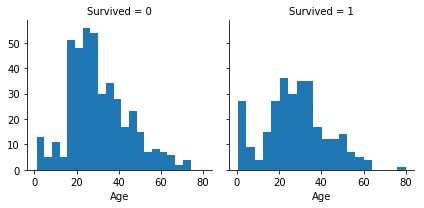

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

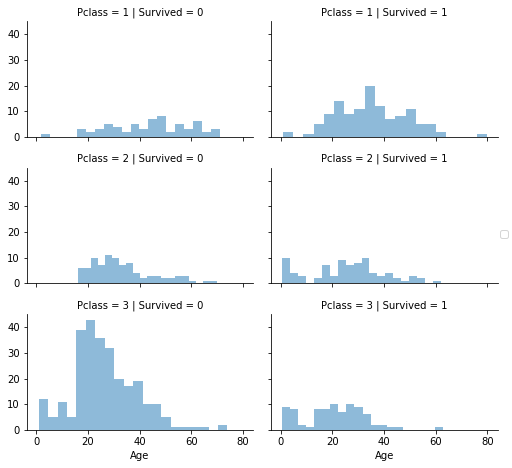

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


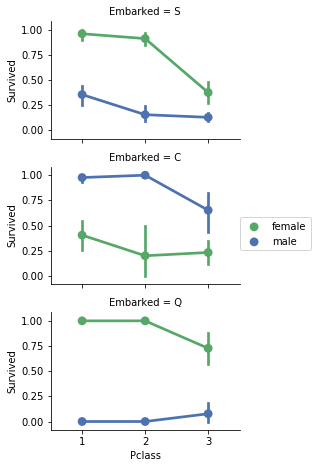

In [14]:
ordered_embarked = train_df.Embarked.value_counts().index

grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


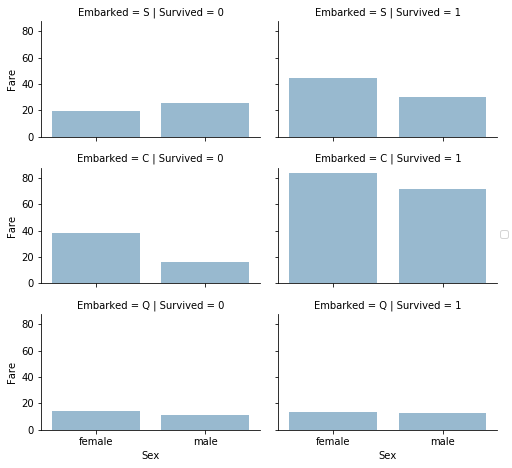

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).